In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf


In [2]:

filename = "roll_uniform_mjdp0_v3.4_10yrs.db"


bins = np.arange(0,365.2*11, 365.25)

name = os.path.basename(filename).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

bundle_list = []

# col here could be anything
metric = maf.metrics.AccumulateM5Metric(metric_name='coadd', bins=bins)
# Select all the visits. Could do something like 'filter="r"' 
sql = 'filter="r"'
slicer = maf.slicers.HealpixSlicer()
plot_dict = {}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))

bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd,filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
#bg.plot_all(closefigs=False)

vals_3 = bundle_list[0].metric_values + 0


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [3]:
filename = "../baseline/baseline_v3.4_10yrs.db"
name = os.path.basename(filename).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

bundle_list = []

# col here could be anything
metric = maf.metrics.AccumulateM5Metric(metric_name='coadd', bins=bins)
# Select all the visits. Could do something like 'filter="r"' 
sql = 'filter="r"'
slicer = maf.slicers.HealpixSlicer()
plot_dict = {}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))

bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd,filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
#bg.plot_all(closefigs=False)

vals_2 = bundle_list[0].metric_values + 0


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


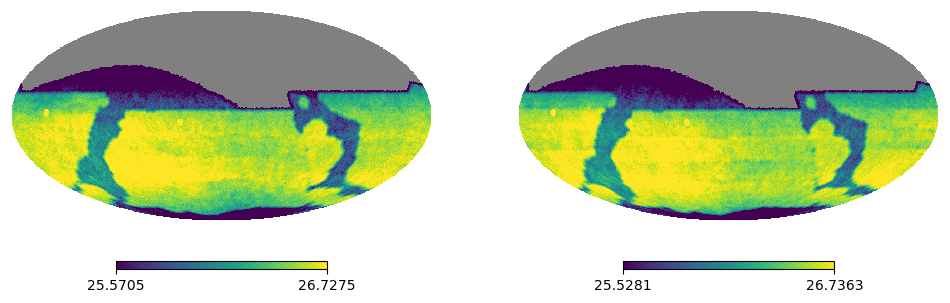

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

plt.axes(ax1)

bin = 3
data = vals_3[:,bin]
low = np.percentile(data[data.mask == False], 10)
high = np.percentile(data[data.mask == False], 90)

hp.mollview(data, hold=True, title='', min=low, max=high)

plt.axes(ax2)

data = vals_2[:,bin]

low = np.percentile(data[data.mask == False], 10)
high = np.percentile(data[data.mask == False], 90)

hp.mollview(data, hold=True, title='', min=low, max=high)



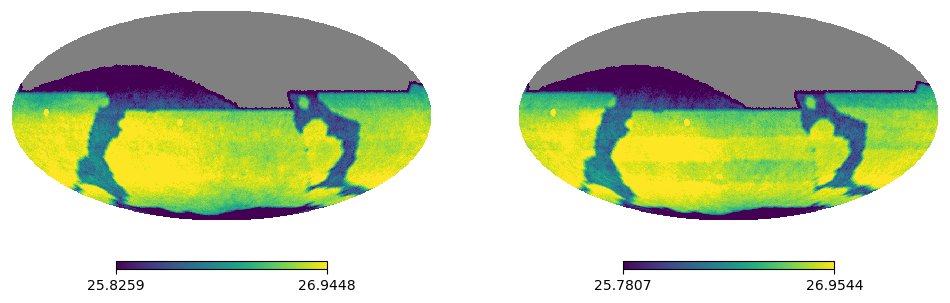

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

plt.axes(ax1)

bin = 6
data = vals_3[:,bin]
low = np.percentile(data[data.mask == False], 10)
high = np.percentile(data[data.mask == False], 90)

hp.mollview(data, hold=True, title='', min=low, max=high)

plt.axes(ax2)

data = vals_2[:,bin]

low = np.percentile(data[data.mask == False], 10)
high = np.percentile(data[data.mask == False], 90)

hp.mollview(data, hold=True, title='', min=low, max=high)



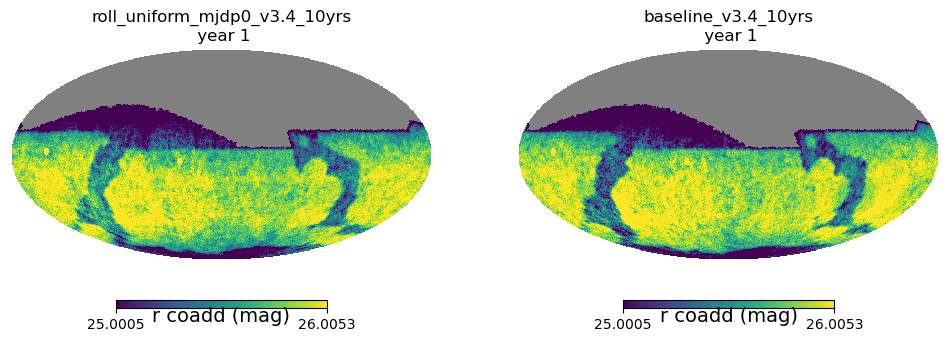

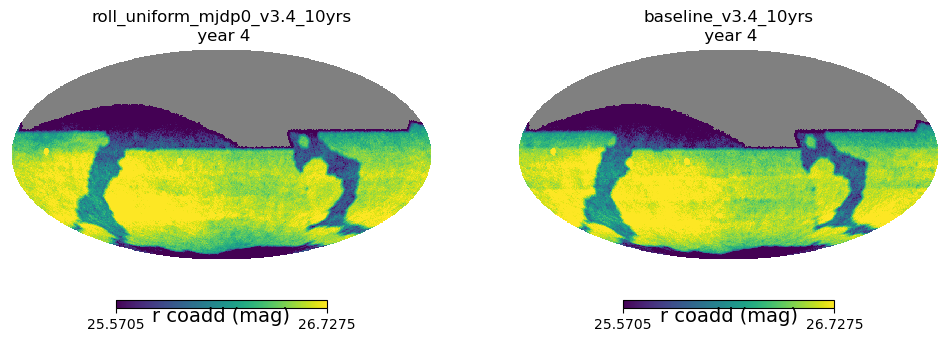

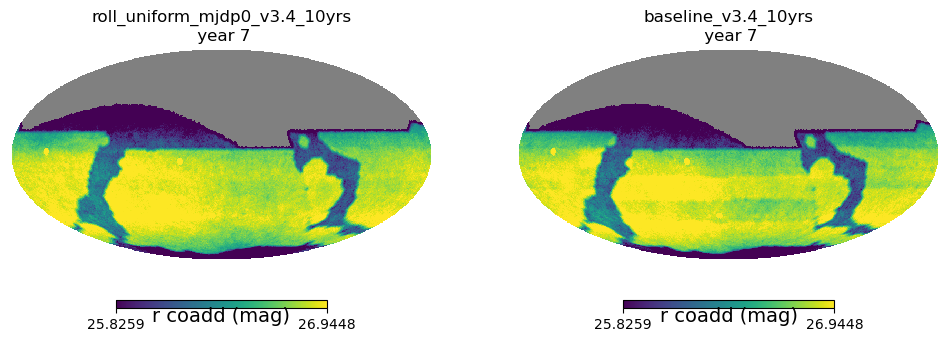

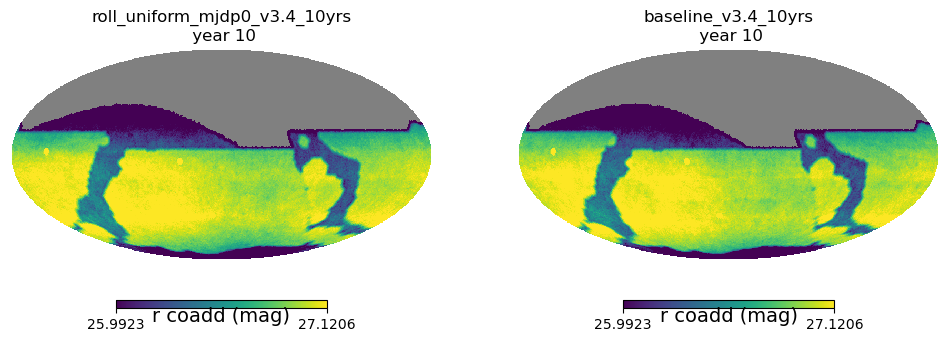

In [6]:
for bin in [0,3,6,9]:

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))
    
    plt.axes(ax1)
    
    data = vals_3[:,bin]
    low = np.percentile(data[data.mask == False], 10)
    high = np.percentile(data[data.mask == False], 90)
    
    hp.mollview(data, hold=True, min=low, max=high,
                title='roll_uniform_mjdp0_v3.4_10yrs\n year %i' % (bin+1),
               unit='r coadd (mag)')
    
    plt.axes(ax2)
    
    data = vals_2[:,bin]
    
    #low = np.percentile(data[data.mask == False], 10)
    #high = np.percentile(data[data.mask == False], 90)
    
    hp.mollview(data, hold=True, min=low, max=high, title='baseline_v3.4_10yrs\n year %i' % (bin+1),
               unit='r coadd (mag)')